In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/Clustering
%ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/Clustering
AudioDigits/  customer-seg.csv    logs.log             OnlineRetail.csv  Pokemon/
CreditCard/   DocumentEmbedding/  Microsoft_Stock.csv  penguins.csv      Rainfall_data.csv


Load Data

In [ ]:
# prompt: create dataframe from csv

import pandas as pd
rainfall_data = pd.read_csv('Rainfall_data.csv')
rainfall_data.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14


Preprocess data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Convert Year, Month, Day to a datetime object
rainfall_data['Date'] = pd.to_datetime(rainfall_data[['Year', 'Month', 'Day']])

# Dropping the original Year, Month, Day columns
rainfall_data.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

# Reordering columns to put 'Date' first
rainfall_data = rainfall_data[['Date', 'Specific Humidity', 'Relative Humidity', 'Temperature', 'Precipitation']]

# Normalize the continuous variables
scaler = StandardScaler()
rainfall_data_scaled = rainfall_data.copy()
rainfall_data_scaled[['Specific Humidity', 'Relative Humidity', 'Temperature', 'Precipitation']] = scaler.fit_transform(
    rainfall_data[['Specific Humidity', 'Relative Humidity', 'Temperature', 'Precipitation']])

# Display the first few rows of the preprocessed data
rainfall_data_scaled.head()

,Date,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000-01-01,-1.453338,-1.100551,1.158401,-0.651415
1,2000-02-01,-1.300156,-0.952341,1.447517,-0.651068
2,2000-03-01,-1.357313,-1.411446,1.576858,-0.651383
3,2000-04-01,-0.143292,-0.669815,0.939282,-0.651352
4,2000-05-01,0.682059,0.209607,0.418874,0.202674


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

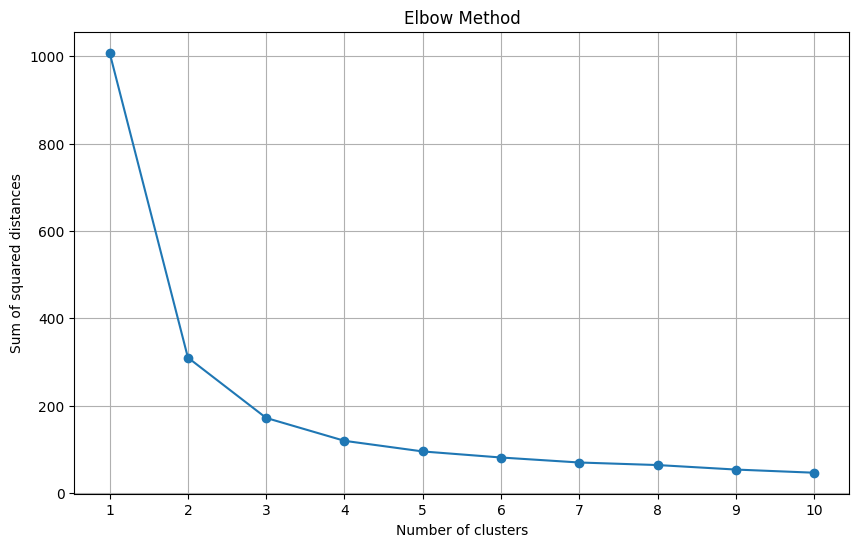

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We will use the Elbow Method to find the optimal number of clusters for K-Means
# We'll cluster based on the continuous variables only, excluding the 'Date' column

# Extracting the relevant columns for clustering
cluster_data = rainfall_data_scaled[['Specific Humidity', 'Relative Humidity', 'Temperature', 'Precipitation']]

# Calculating sum of squared distances for different numbers of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(cluster_data)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Clustering

In [ ]:
# Performing K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(cluster_data)

# Adding the cluster labels to the original dataframe
rainfall_data['Cluster'] = cluster_labels

# Displaying the first few rows of the dataframe with cluster labels
rainfall_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation,Cluster
0,2000,1,1,8.06,48.25,23.93,0.00,3
1,2000,2,1,8.73,50.81,25.83,0.11,3
2,2000,3,1,8.48,42.88,26.68,0.01,3
3,2000,4,1,13.79,55.69,22.49,0.02,1
4,2000,5,1,17.40,70.88,19.07,271.14,1


Analysis

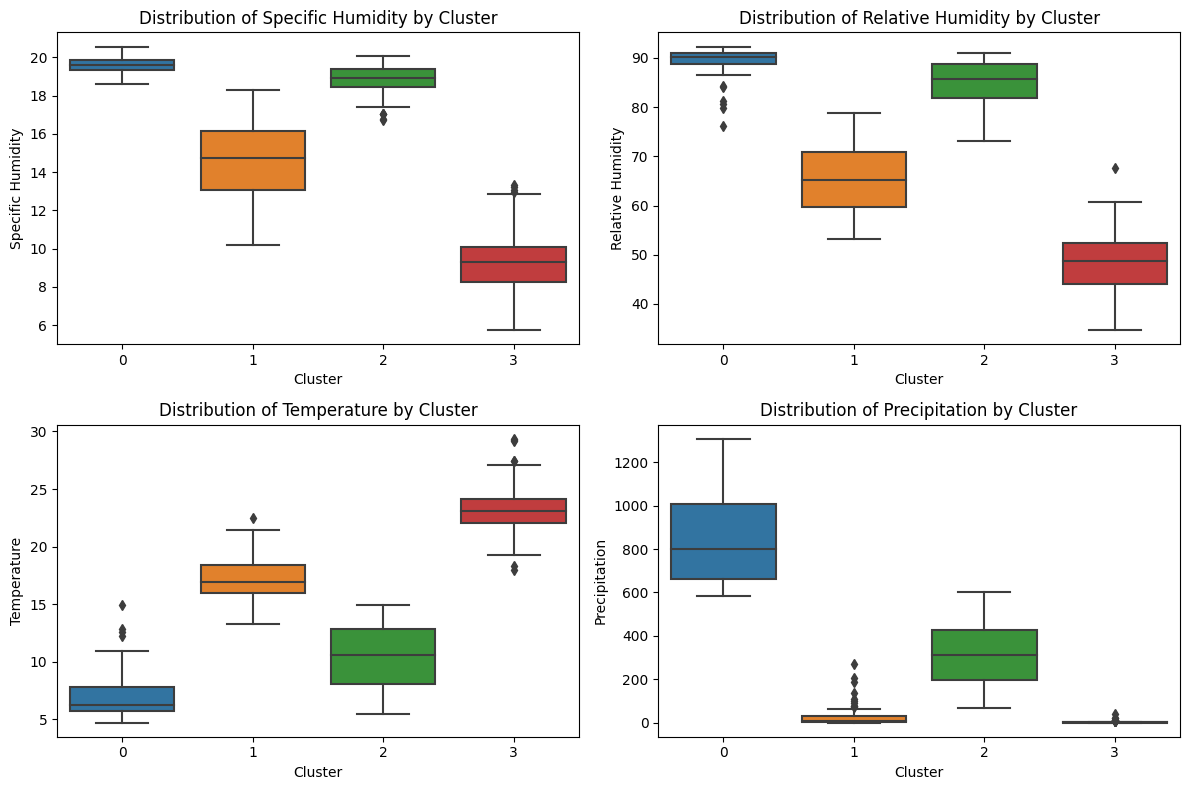

,Specific Humidity,Relative Humidity,Temperature,Precipitation,Cluster
0,19.604634,88.877805,7.252683,833.271707,0
1,14.445556,65.490417,17.225833,27.608056,1
2,18.778627,84.839608,10.322745,308.561961,2
3,9.448182,48.446364,23.271250,2.553977,3


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the clusters
plt.figure(figsize=(12, 8))

# Plotting each feature in a subplot
for i, column in enumerate(['Specific Humidity', 'Relative Humidity', 'Temperature', 'Precipitation']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Cluster', y=column, data=rainfall_data)
    plt.title(f'Distribution of {column} by Cluster')

plt.tight_layout()
plt.show()

# Calculating the centroids for each cluster
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=['Specific Humidity', 'Relative Humidity', 'Temperature', 'Precipitation'])
centroids_df['Cluster'] = centroids_df.index

# Displaying the centroids
centroids_df

In [ ]:
Cluster Characteristics

    Cluster 0:
        Specific Humidity: High (19.60)
        Relative Humidity: Very High (88.88)
        Temperature: Low (7.25°C)
        Precipitation: Very High (833.27 mm)
        Characteristics: This cluster likely represents periods with cool temperatures and very high humidity, resulting in heavy rainfall.

    Cluster 1:
        Specific Humidity: Moderate (14.45)
        Relative Humidity: Moderate (65.49)
        Temperature: Warm (17.23°C)
        Precipitation: Low (27.61 mm)
        Characteristics: Represents warmer periods with moderate humidity levels and relatively low precipitation.

    Cluster 2:
        Specific Humidity: High (18.78)
        Relative Humidity: High (84.84)
        Temperature: Cool (10.32°C)
        Precipitation: Moderate (308.56 mm)
        Characteristics: Cool temperatures with high humidity, leading to moderate rainfall.

    Cluster 3:
        Specific Humidity: Low (9.45)
        Relative Humidity: Low (48.45)
        Temperature: Hot (23.27°C)
        Precipitation: Very Low (2.55 mm)
        Characteristics: Hot and dry periods with low humidity and minimal rainfall.